# Importing required libraries and data

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow.keras.utils as tfk


Using TensorFlow backend.


In [2]:
train_data=pd.read_csv('D:\\AI STUDY MATERIAL\\mnist_train.csv')
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_data.shape

(42000, 785)

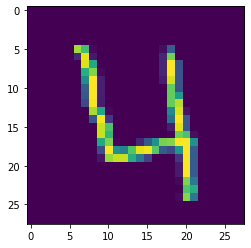

In [4]:
f=train_data.iloc[3,1:].values.reshape(28,28)
plt.imshow(f)

In [5]:
#Storing Pixel array in form length width and channel in df_x
df_x = train_data.iloc[:,1:].values.reshape(len(train_data),28,28,1).astype('float32')

#Storing the labels in y
y = train_data.iloc[:,0].values
df_y = tfk.to_categorical(y, num_classes=10, dtype='int64')

In [6]:
df_x.shape

(42000, 28, 28, 1)

In [7]:
df_y.shape

(42000, 10)

In [8]:
X_train,X_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.2)

In [9]:
#Building the model
model = Sequential()
model.add(Convolution2D(32,3,data_format='channels_last',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               540900    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_1 (Activation)    (None, 10)               

In [11]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,verbose=2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
 - 35s - loss: 2.8246 - accuracy: 0.9043 - val_loss: 0.1392 - val_accuracy: 0.9629
Epoch 2/10
 - 34s - loss: 0.1574 - accuracy: 0.9543 - val_loss: 0.1213 - val_accuracy: 0.9664
Epoch 3/10
 - 34s - loss: 0.1215 - accuracy: 0.9642 - val_loss: 0.1220 - val_accuracy: 0.9662
Epoch 4/10
 - 34s - loss: 0.1103 - accuracy: 0.9675 - val_loss: 0.1227 - val_accuracy: 0.9673
Epoch 5/10
 - 34s - loss: 0.1102 - accuracy: 0.9669 - val_loss: 0.1260 - val_accuracy: 0.9665
Epoch 6/10
 - 34s - loss: 0.1026 - accuracy: 0.9689 - val_loss: 0.1280 - val_accuracy: 0.9686
Epoch 7/10
 - 34s - loss: 0.0987 - accuracy: 0.9707 - val_loss: 0.1173 - val_accuracy: 0.9663
Epoch 8/10
 - 34s - loss: 0.0898 - accuracy: 0.9737 - val_loss: 0.1201 - val_accuracy: 0.9712
Epoch 9/10
 - 34s - loss: 0.0889 - accuracy: 0.9743 - val_loss: 0.1399 - val_accuracy: 0.9677
Epoch 10/10
 - 37s - loss: 0.0766 - accuracy: 0.9776 - val_loss: 0.1329 - val_accuracy: 0.9690


Now taking some rows from the train_data, we will predict the output for the pixel values and then we will crosscheck it with the labels of those pixel values. 

In [12]:
train_data.iloc[100:105:,1:]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
act=train_data.iloc[50:60:,:1]
act

,label
50,7
51,5
52,1
53,9
54,0
55,2
56,2
57,3
58,9
59,1


In [14]:
#predicting output for the rows of pixel values
var = train_data.iloc[50:60:,1:].values.reshape(10,28,28,1).astype('float32')
predicted=model.predict_classes(var)
predicted

array([7, 5, 1, 9, 0, 2, 2, 3, 9, 1], dtype=int64)

In [15]:
cmp=pd.DataFrame({"Actual":act['label'],"Predicted":predicted})
cmp

,Actual,Predicted
50,7,7
51,5,5
52,1,1
53,9,9
54,0,0
55,2,2
56,2,2
57,3,3
58,9,9
59,1,1


As you can see, our model has predicted all the labesl accurately, hence, we can now use this model to predict our test_data.

In [16]:
test_data=pd.read_csv('D:\\AI STUDY MATERIAL\\mnist_test.csv')
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
x_test = test_data.values.reshape(len(test_data),28,28,1).astype('float32')
x_test.shape

(28000, 28, 28, 1)

In [18]:
result=model.predict_classes(x_test)
result

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [19]:
test_result=pd.DataFrame({'Label':result})
final_result=pd.concat([test_result,test_data],1)
final_result

,Label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
